/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


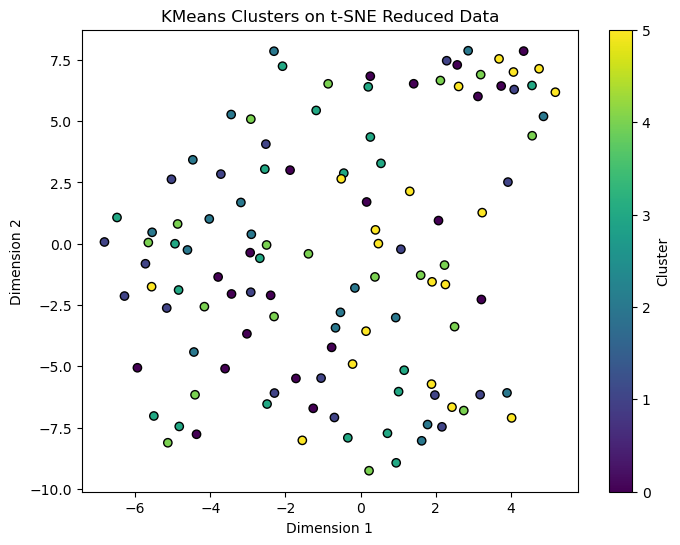

KMeans Cluster
0    21
3    20
5    19
4    19
1    18
2    18
Name: count, dtype: int64


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import pandas as pd

# mfcc_df = pd.read_csv('MFCC_Meaned_20.csv')
# mfcc_tsne_df = pd.read_csv('MFCCtsnePCA.csv')
mfcc_tsne_df = pd.read_csv('MFCCtsnePCA.csv')

song_names = mfcc_tsne_df['Song']  # Save the 'Song' column
mfcc_tsne_df = mfcc_tsne_df.drop(columns=['Song'])  # Use only the MFCC coefficients for PCA and t-SNE


# Assuming mfcc_df is your DataFrame with 115 songs and 20 MFCC coefficients
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans.fit_predict(mfcc_tsne_df)

# Add KMeans labels to the DataFrame for analysis
mfcc_tsne_df['KMeans Cluster'] = kmeans_labels

# Visualizing KMeans clusters using t-SNE reduced data
plt.figure(figsize=(8, 6))
plt.scatter(mfcc_tsne_df['Dimension 1'], mfcc_tsne_df['Dimension 2'], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clusters on t-SNE Reduced Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.colorbar(label='Cluster')
plt.show()

mfcc_tsne_df['Song'] = song_names  # Add the 'Song' column back to the t-SNE results
mfcc_tsne_df.to_csv('Output.csv')

# Optional: Print cluster assignment counts
print(mfcc_tsne_df['KMeans Cluster'].value_counts())
